<a href="https://colab.research.google.com/github/TyroneNorth/Data-Science/blob/master/Big_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Tyrone North
Title: Image Recognition via Convolutional Neural Networks
```



#Motivation/Purpose

Big Cats are some of the most endandered species on the planet. These ferocious predators numbers have been dwindling for decades and tracking them can be crucial to their survival if we do not wish they go extinct. This model will be trained to identify  7 of the big cats.


Tools and Technologies:

1. Tensorflow framework and tools for access to Keras and advanced tools
2. Keras deep learning framework for designing and training a model
3. Convolutional Neural Netowrks 

#What are Covnets?
Convolutional Neural Networks is a neural network architecture that starts with a convolutional layer with the goal of extracting common patterns from training instances. 
Several kernal filters are applied and convolve the raw pixel values into higher level patterns.
Taking sections of the image equal to the size of the kernel and calculating the dot product between the values in the path and those in the kernel matrix
The kernal is then slid across the entire image convolving the image as it goes
The convolutional layer is followed by a non-linear activation function. The output is passed along to the pooling layer where the max or the avg of the convolved kernel. 
Big models include many pooling and convolutional layers

In [ ]:
#imports

import os, shutil
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Conv2D, Dropout 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import callbacks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#create subfolders for training, testing, and val;idation sets


original_dataset_dir = '/content/drive/My Drive/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats'

base_dir = '/content/drive/My Drive/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats'

train_dir = '/content/drive/My Drive/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train'

validation_dir = '/content/drive/My Drive/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Validation'

test_dir = '/content/drive/My Drive/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test'

cheetah_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Cheetah'

cheetah_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Cheetah'

cheetah_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Validation/Cheetah'

cougar_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Cougar'

cougar_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Cougar'

cougar_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Cougar'

jaguar_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Jaguars'

jaguar_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Jaguars'

jaguar_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Validation/Jaguars'

leopard_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Leopard'

leopard_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Leopard'

leopard_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Leopard'

lions_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Lions'

lions_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Lions'

lions_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Lions'

lynx_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Lynx'

lynx_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Lynx'

lynx_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Lynx'

tigers_train_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Tigers'

tigers_test_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Test/Tigers'

tigers_validation_dir = '/content/drive/My Drive/Documents/Grad School/COSC 6300 -  Programming for Data Science/Final Project/Big Cats/Train/Tigers'


In [ ]:
#Number of images per training set

print(f'total training cheetah images:', len(os.listdir(cheetah_train_dir)), '\n',
f'total training cougar images:', len(os.listdir(cougar_train_dir)), '\n',
f'total training jaguar images:', len(os.listdir(jaguar_train_dir)), '\n',
f'total training leopard images:', len(os.listdir(leopard_train_dir)), '\n',
f'total training lions images:', len(os.listdir(lions_train_dir)), '\n',
f'total training lynx images:', len(os.listdir(lynx_train_dir)), '\n'
      )

total training cheetah images: 627 
 total training cougar images: 358 
 total training jaguar images: 665 
 total training leopard images: 211 
 total training lions images: 210 
 total training lynx images: 790 



#Defining the model blueprint

In [ ]:
#model blueprint, summary statistics, 1.1 million parameters

model_blueprint = Sequential()

model_blueprint.add(Conv2D(32,
                  kernel_size = (3, 3),
                  activation = 'relu', #rectified linear unit, zeroes out negative values
                  input_shape = (150, 150, 3)))
model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2)))

model_blueprint.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2)))
  
model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2)))

model_blueprint.add(Flatten())
model_blueprint.add(Dense(512, activation = 'relu'))
model_blueprint.add(Dense(7, activation = 'softmax')) #Returns an array of 7 probability scores

model_blueprint.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [ ]:
#defining convolutional neural network  

RMS = RMSprop(lr=1e-4) #optimizer, updates the network with data based on optimizer and loss function

def convolutional_model(model_name = str):
  '''Defines a convolutional nueral network.
  Takes model name and returns pre-configured network.'''
  model_name = Sequential()



  model_name.add(Conv2D(32,
                  kernel_size = (3, 3),
                  activation = 'relu',
                  input_shape = (150, 150, 3)))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))
  
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Flatten())
  model_name.add(Dense(512, activation = 'relu'))
  model_name.add(Dense(7, activation = 'softmax'))


#loss function states how the network will be able to measure its performance
  model_name.compile(optimizer = RMS, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model_name

#Image setup for training and testing data

The keras preprocessing image module has built-in functionality for generating images into batches of preprocessed tensors

In [ ]:
#rescales all images by 1/255

def create_train_datagen():
  '''Resizes images for training set.'''
  train_datagen = ImageDataGenerator(rescale = 1./255)
  return train_datagen

train_datagen = create_train_datagen()

def create_test_datagen():
  '''Resizes images for test set.'''
  test_datagen = ImageDataGenerator(rescale = 1./255)
  return test_datagen

test_datagen = create_test_datagen()


#resizes all triaining images to 150 x 150
def create_train_generator(batch_size = int, target_size = (int, int), class_mode =  'binary' ):
  '''Creates image generator for feeding batches of images.'''
  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size = (150, 150),
      batch_size = 20,
      class_mode = 'categorical')
  return train_generator

train_generator = create_train_generator(batch_size = 20, target_size = (150,150))


Found 3494 images belonging to 7 classes.


In [ ]:
#resizes all validation images to 150 x 150
def create_validation_generator(batch_size = int, target_size = (int, int), class_mode = 'binary'):
  '''Creates image generator for validation images.
  Defines the batch size, resizes the image and sets class mode'''
  validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size = (150, 150),
      batch_size = 20,
      class_mode = 'categorical')
  return validation_generator

validation_generator = create_validation_generator(20, (150,150))


Found 672 images belonging to 7 classes.


In [ ]:
#checking the shape of batches
for data_batch, labels_batch in train_generator:
  print('data batch shape : ', data_batch.shape, '\n',
        'labels batch shape : ', labels_batch.shape)
  break

data batch shape :  (20, 150, 150, 3) 
 labels batch shape :  (20, 7)


In [ ]:
#Setting up early stopping to halt the training of the model once accuracy on validation set stops improving
#This will help prevent severe overfitting and underfitting
#from tensorflow.keras import callbacks


es = callbacks.EarlyStopping(monitor = 'val_loss', restore_best_weights = True, mode = 'auto', verbose = 1, patience = 10)

In [ ]:
#Model fit function
def history(model = tf.keras.models.Sequential, steps_per_epoch = int, epochs = int, validation_steps = int): #takes model and three int parameters
  '''Creates a network object.
  Defines the training parameters and returns model.fit object.
  Takes keras model, steps per epoch, epochs, and validation steps'''
  history = model.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=validation_steps,
                      callbacks = [es])
  return history

##Training Model #1

In [ ]:
#fitting/training the neural network

model_one = convolutional_model('baseline_model')

history1 = history(model_one, 100, 50, 20)#100 = steps per epoch, 50 = epochs, 20 = validation  steps

Epoch 1/50
  9/100 [=>............................] - ETA: 9:54 - loss: 1.9084 - accuracy: 0.2000

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 828s 8s/step - loss: 1.8366 - accuracy: 0.2425 - val_loss: 1.9807 - val_accuracy: 0.2050
Epoch 2/50
100/100 [==============================] - 332s 3s/step - loss: 1.6815 - accuracy: 0.3610 - val_loss: 1.7719 - val_accuracy: 0.2975
Epoch 3/50
100/100 [==============================] - 158s 2s/step - loss: 1.5428 - accuracy: 0.4183 - val_loss: 1.6881 - val_accuracy: 0.3250
Epoch 4/50
100/100 [==============================] - 81s 814ms/step - loss: 1.4954 - accuracy: 0.4348 - val_loss: 1.5626 - val_accuracy: 0.3650
Epoch 5/50
100/100 [==============================] - 43s 430ms/step - loss: 1.4131 - accuracy: 0.4700 - val_loss: 1.4985 - val_accuracy: 0.4025
Epoch 6/50
100/100 [==============================] - 37s 365ms/step - loss: 1.3247 - accuracy: 0.5075 - val_loss: 1.4457 - val_accuracy: 0.4275
Epoch 7/50
100/100 [==============================] - 29s 286ms/step - loss: 1.2749 - accuracy: 0.5145 - val_loss: 1.3904 - val_accuracy: 0.3925
Ep

In [ ]:
#save model for later use
model_one.save('big_cats_pre_model.h5')

###Accuracy and loss

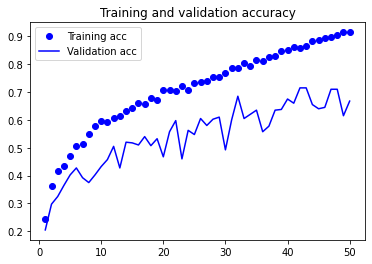

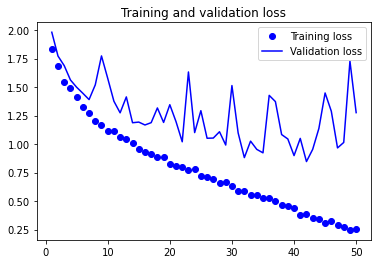

In [ ]:
#Defining accuracy and loss graphs

def acc_vloss(history_model = str, filename = str, filename2 = str):
  '''Plots the training and validation accuracy and loss'''
  acc = history_model.history['accuracy']
  val_acc = history_model.history['val_accuracy']
  loss = history_model.history['loss']
  val_loss = history_model.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.savefig(filename2)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.savefig(filename)
  plt.show()
  
acc_vloss(history1, 'first_run_acc.svg', 'first_run_loss.svg')

The Training accuracy continues to increase as the chart shows. It is  reasonable to assume that the accuracy is likely to increase to 100% but thanks to early stopping the model never trained that far.

Data Augmentation will help with the low image count. By transforming each image in the dataset either by rotating, or shifting, etc the image, we can essentially add variations of the imageset to increase the training image pool. This isn't new data, only remixed data seen from a different perspective. The data points will be higly correlated giving our model time training with feature sets.

I'll also include a dropout layer to help with the overfitting

#Defining Second Model

In [ ]:
#model is overfitting badly
#setting up data augmentation to mitigate overfitting on small dataset

datagen = ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [ ]:
#new convnet with dropout layer to mitigate overfitting

def convolutional_dropout_model(model_name =str):
  '''Defiines a CNN with dropout layer and returns network'''
  model_name = Sequential()

  model_name.add(Conv2D(32,
                  kernel_size = (3, 3),
                  activation = 'relu',
                  input_shape = (150, 150, 3)))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))
  
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Flatten())
  #Dropout rate is the fraction of the features that are zeroed out *note different implementation during test v training
  model_name.add(Dropout(0.5)) 
  model_name.add(Dense(512, activation = 'relu'))
  model_name.add(Dense(7, activation = 'softmax'))

  model_name.compile(optimizer = RMS, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model_name

In [ ]:
#Generating augmented images

def create_train_datagen_aug():
  '''Augments training images.
  Resizes, rotates, shifts dimensions, shear, zoom, and flips images.'''
  train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)
  return train_datagen_aug

train_datagen_aug = create_train_datagen_aug()

test_gen =create_test_datagen()

train_generator = create_train_generator(32, (150, 150))

validation_generator = create_validation_generator((150,150), 32)




Found 3494 images belonging to 7 classes.
Found 672 images belonging to 7 classes.


##Training** Model 2

In [ ]:
model_two = convolutional_dropout_model('dropout_model')
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 128)      

In [ ]:
#training/fitting neural network with dropout layer


history2 = history(model_two, 100, 100, 32)

Epoch 1/100
 37/100 [==========>...................] - ETA: 15s - loss: 1.8682 - accuracy: 0.1919

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 28s 276ms/step - loss: 1.8653 - accuracy: 0.2105 - val_loss: 1.9593 - val_accuracy: 0.2125
Epoch 2/100
100/100 [==============================] - 26s 258ms/step - loss: 1.7173 - accuracy: 0.3250 - val_loss: 1.8639 - val_accuracy: 0.2609
Epoch 3/100
100/100 [==============================] - 26s 265ms/step - loss: 1.6316 - accuracy: 0.3845 - val_loss: 1.7962 - val_accuracy: 0.2891
Epoch 4/100
100/100 [==============================] - 26s 263ms/step - loss: 1.5475 - accuracy: 0.4077 - val_loss: 1.9220 - val_accuracy: 0.2625
Epoch 5/100
100/100 [==============================] - 26s 257ms/step - loss: 1.5097 - accuracy: 0.4240 - val_loss: 1.7876 - val_accuracy: 0.3422
Epoch 6/100
100/100 [==============================] - 26s 258ms/step - loss: 1.4187 - accuracy: 0.4809 - val_loss: 1.6031 - val_accuracy: 0.4000
Epoch 7/100
100/100 [==============================] - 26s 263ms/step - loss: 1.3702 - accuracy: 0.4915 - val_loss: 1.8516 - val_accurac

In [ ]:
#saving second model
model_two.save('second_run_model.h5')

###Accuracy and loss

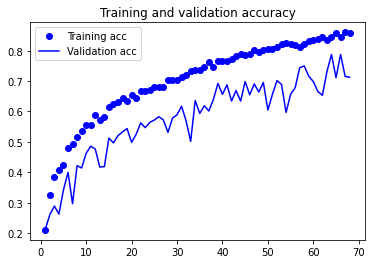

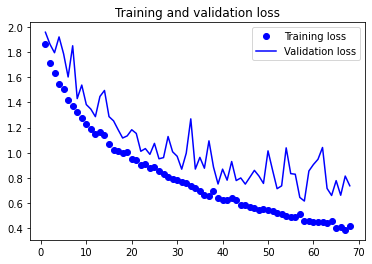

In [ ]:
#plot accuracy and loss
acc_vloss(history2, 'second_run_acc.svg', 'second_run_loss.svg')

#Metrics

In [ ]:
#evaluating the final model
def create_test_generator(batch_size = int, target_size = (int, int), class_mode = 'binary'):
  '''Creates test image generator.
  Takes batch size, target image size, and class mode.'''
  test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='categorical')
  return test_generator
  
test_loss, test_accuracy = model_two.evaluate(create_test_generator(20, (150, 150), 'categorical'), steps = 50)
print('test acc:', test_accuracy)

Found 1648 images belonging to 7 classes.
 7/50 [===>..........................] - ETA: 3:54 - loss: 0.5126 - accuracy: 0.8500

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/50 [==============================] - 314s 6s/step - loss: 0.5378 - accuracy: 0.8140
test acc: 0.8140000104904175


#Loading Pre-trained model

In [ ]:
#Using a pretrained model

from tensorflow.keras.applications import VGG16

#instantiating VGG16 convolutional base with 14.7 mil parameters

convolutional_base = VGG16(weights = 'imagenet',
                            include_top = False,
                            input_shape = (150, 150, 3))

convolutional_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

##Using a pretrained model with data augmentation

In [ ]:

#This method is slower and more expensive but allows data augmentation during training, which is great for smaller datasets
#Adding convolutional base and Dense layers

def convolutional_base_dense_model(model_name = str):
  '''Defines base of network from pretrained model and freezes base'''
  model_name = Sequential()

  model_name.add(convolutional_base)
  model_name.add(Flatten())
  model_name.add(Dense(256, activation = 'relu'))
  model_name.add(Dense(7, activation = 'softmax'))
  return model_name

#Freezing convolutional_base trainable parameters  
convolutional_base.trainable = False


In [ ]:
train_datagen_aug = create_train_datagen_aug()

test_datagen = create_test_datagen()

train_generator = create_train_generator(20, (150, 150), 'categorical')

validation_generator = create_validation_generator(20, (150, 150), 'categorical')

Found 3494 images belonging to 7 classes.
Found 672 images belonging to 7 classes.


In [ ]:
model_four = convolutional_base_dense_model('trained_plus')

model_four.compile(optimizer = RMS,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

###Training Model 4

In [ ]:
def history(model = tf.keras.models.Sequential, steps_per_epoch = int, epochs = int, validation_steps = int): #takes model and three int parameters
  '''Creates a network object.
  Defines the training parameters and returns model.fit object.
  Takes keras model, steps per epoch, epochs, and validation steps'''
  history = model.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=validation_steps,
                      callbacks = [callbacks.EarlyStopping(monitor = 'loss' )])
  return history

In [ ]:
history4 = history(model_four, 100, 30, 50)

Epoch 1/30
 24/100 [======>.......................] - ETA: 19s - loss: 0.0793 - accuracy: 0.9854

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 23s 229ms/step - loss: 0.0910 - accuracy: 0.9824
Epoch 2/30
100/100 [==============================] - 23s 234ms/step - loss: 0.0778 - accuracy: 0.9875
Epoch 3/30
100/100 [==============================] - 22s 221ms/step - loss: 0.0679 - accuracy: 0.9895
Epoch 4/30
100/100 [==============================] - 21s 208ms/step - loss: 0.0584 - accuracy: 0.9890
Epoch 5/30
100/100 [==============================] - 22s 219ms/step - loss: 0.0572 - accuracy: 0.9910
Epoch 6/30
100/100 [==============================] - 21s 209ms/step - loss: 0.0449 - accuracy: 0.9915
Epoch 7/30
100/100 [==============================] - 20s 203ms/step - loss: 0.0380 - accuracy: 0.9975
Epoch 8/30
100/100 [==============================] - 22s 221ms/step - loss: 0.0322 - accuracy: 0.9975
Epoch 9/30
100/100 [==============================] - 22s 219ms/step - loss: 0.0281 - accuracy: 0.9985
Epoch 10/30
100/100 [==============================] - 23s 229ms/step - loss: 0.0232

In [ ]:
model_four.save('big_cats_four4.h5')

#Fine-Tuning

In [ ]:
#unfreezing some layers
convolutional_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

##Unfreezing model base for training

In [ ]:
#unfreezing block5_pool & block5_conv1 - 3
convolutional_base.trainable = True

set_trainable = False 

for layer in convolutional_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

len(convolutional_base.trainable_weights)

6

##Training Final Model

In [ ]:
RMS = RMSprop(lr=1e-5)
model_four.compile(loss = 'categorical_crossentropy', optimizer = RMS, metrics = ['accuracy'] )

history5 = history(model_four, 100, 100, 50)

Epoch 1/100
100/100 [==============================] - 27s 266ms/step - loss: 0.0070 - accuracy: 0.9990 - val_loss: 1.1530 - val_accuracy: 0.7560
Epoch 2/100
100/100 [==============================] - 22s 218ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 3/100
100/100 [==============================] - 22s 215ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4/100
 99/100 [============================>.] - ETA: 0s - loss: 8.5775e-04 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 22s 215ms/step - loss: 8.5266e-04 - accuracy: 1.0000
Epoch 5/100
100/100 [==============================] - 21s 208ms/step - loss: 7.3649e-04 - accuracy: 1.0000
Epoch 6/100
100/100 [==============================] - 21s 214ms/step - loss: 4.3276e-04 - accuracy: 1.0000
Epoch 7/100
100/100 [==============================] - 22s 217ms/step - loss: 3.3071e-04 - accuracy: 1.0000
Epoch 8/100
100/100 [==============================] - 21s 214ms/step - loss: 2.3750e-04 - accuracy: 1.0000
Epoch 9/100
100/100 [==============================] - 21s 215ms/step - loss: 5.9558e-04 - accuracy: 0.9995


###Accuracy and loss

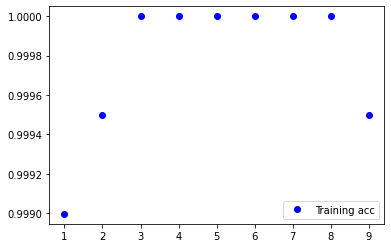

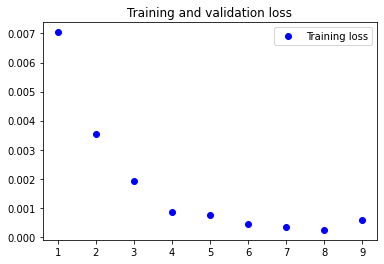

In [ ]:
acc_vloss(history5, 'final_run_acc.svg', 'final_run_loss.svg')

###Metrics

In [ ]:
#evaluating the final model
def create_test_generator(batch_size = int, target_size = (int, int), class_mode = 'binary'):
  '''Creates test image generator.
  Takes batch size, target image size, and class mode.'''
  test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='categorical')
  return test_generator
  
test_loss, test_accuracy = model_four.evaluate(create_test_generator(20, (150, 150), 'categorical'), steps = 50)
print('test acc:', test_accuracy)

Found 1648 images belonging to 7 classes.
 8/50 [===>..........................] - ETA: 1:20 - loss: 0.7810 - accuracy: 0.8750

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/50 [==============================] - 130s 3s/step - loss: 0.8781 - accuracy: 0.8620
test acc: 0.8619999885559082


In [ ]:
model_four.save('big_cat_final_model5.h5')

In [ ]:
model_four.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 1799      
Total params: 16,813,895
Trainable params: 9,178,631
Non-trainable params: 7,635,264
_________________________________________________________________
